In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
train_data = keras.utils.image_dataset_from_directory(
    directory = 'Emotion_dataset/train/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (48,48)
)

Val_data = keras.utils.image_dataset_from_directory(
    directory = 'Emotion_dataset/test/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (48,48)
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [3]:
for images, labels in train_data:
    print("Images shape:", images.shape)
    print("Labels:", labels)
    break

Images shape: (32, 48, 48, 3)
Labels: tf.Tensor([3 2 6 4 0 1 4 3 4 3 5 5 4 5 2 0 5 5 6 4 5 4 0 6 3 2 3 6 3 6 5 5], shape=(32,), dtype=int32)


In [4]:
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    label = tf.keras.utils.to_categorical(label, num_classes=7)
    return image,label

train_data = train_data.map(process)
Val_data = Val_data.map(process)

In [5]:
for images_normalized, labels in train_data.take(1):  # Take one batch
    image_normalized = images_normalized[0]

    print("\nPixel values of the first image after normalization:")
    print(image_normalized.numpy())


Pixel values of the first image after normalization:
[[[0.21176471 0.21176471 0.21176471]
  [0.14117648 0.14117648 0.14117648]
  [0.08627451 0.08627451 0.08627451]
  ...
  [0.02745098 0.02745098 0.02745098]
  [0.01568628 0.01568628 0.01568628]
  [0.00392157 0.00392157 0.00392157]]

 [[0.13725491 0.13725491 0.13725491]
  [0.1254902  0.1254902  0.1254902 ]
  [0.0627451  0.0627451  0.0627451 ]
  ...
  [0.01960784 0.01960784 0.01960784]
  [0.02352941 0.02352941 0.02352941]
  [0.00784314 0.00784314 0.00784314]]

 [[0.07058824 0.07058824 0.07058824]
  [0.06666667 0.06666667 0.06666667]
  [0.04313726 0.04313726 0.04313726]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01960784 0.01960784 0.01960784]
  [0.00392157 0.00392157 0.00392157]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.2627451  0.2627451  0.2627451 ]
  [0.38431373 0.38431373 0.38431373]
  [0.35686275 0.35686275 0.35686275]]

 [[0.         0.    

In [6]:
for images_normalized, labels in train_data.take(1):  # Take one batch
    image_normalized = images_normalized[0]

    print("Minimum pixel value after normalization:", tf.reduce_min(image_normalized).numpy())
    print("Maximum pixel value after normalization:", tf.reduce_max(image_normalized).numpy())

Minimum pixel value after normalization: 0.06666667
Maximum pixel value after normalization: 0.9137255


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(7, activation='softmax')
])

C:\Users\yashw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │              

 Total params: 1,279,431 (4.88 MB)

 Trainable params: 1,277,447 (4.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_data, epochs = 100, validation_data = Val_data)

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 45ms/step - accuracy: 0.2343 - loss: 2.3464 - val_accuracy: 0.3555 - val_loss: 1.7395
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.3961 - loss: 1.5723 - val_accuracy: 0.1610 - val_loss: 1.9874
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.4361 - loss: 1.4602 - val_accuracy: 0.4595 - val_loss: 1.4044
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.4602 - loss: 1.3930 - val_accuracy: 0.5042 - val_loss: 1.3061
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.4865 - loss: 1.3393 - val_accuracy: 0.5261 - val_loss: 1.2423
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.5014 - loss: 1.3045 - val_accuracy: 0.4883 - val_loss: 1.3132
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.5123 - loss: 1.2749 - val_accuracy: 0.5432 - val_loss: 1.1975
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.5253 - loss: 1

In [11]:
test_loss, test_acc = model.evaluate(Val_data)
print(f'Test accuracy: {test_acc:.2f}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6367 - loss: 1.1428
Test accuracy: 0.64


In [12]:
loss, accuracy = model.evaluate(Val_data)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)
print('\n')
loss, accuracy = model.evaluate(train_data)
print("Training Loss:", loss)
print("Training Accuracy:", accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6389 - loss: 1.1408
Validation Loss: 1.130457878112793
Validation Accuracy: 0.6430760622024536


898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9633 - loss: 0.1639
Training Loss: 0.15479141473770142
Training Accuracy: 0.9666306972503662


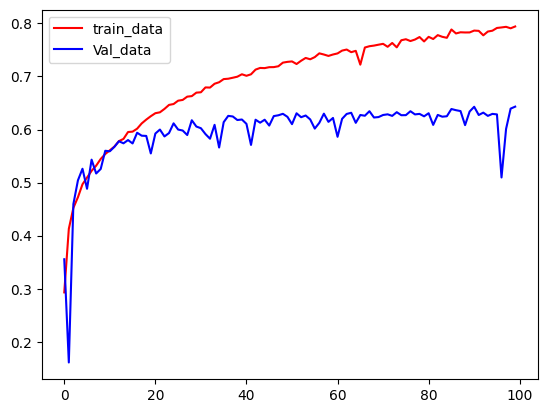

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], color='red', label='train_data')
plt.plot(history.history['val_accuracy'], color='blue', label='Val_data')
plt.legend()
plt.show()

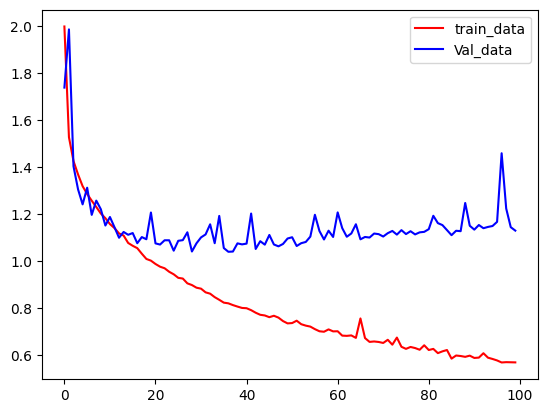

In [14]:
plt.plot(history.history['loss'], color='red', label='train_data')
plt.plot(history.history['val_loss'], color='blue', label='Val_data')
plt.legend()
plt.show()

In [15]:
model.save('emotion_detection_model_96.h5')
print("Model saved to disk.")

Model saved to disk.
